In [1]:
# !python -m rl_zoo3.train --algo sac --env Pendulum-v1 --eval-freq 10000 --eval-episodes 10 -f logs/sac_pendulum


In [2]:
# !python -m rl_zoo3.train --algo td3 --env Pendulum-v1 --eval-freq 10000 --eval-episodes 10 -f logs/td3_pendulum


In [3]:
import numpy as np

# Simulated returns (e.g., total reward per episode) for 10 seeds:
sac_returns = np.random.normal(loc=-250, scale=50, size=(10,))  # SAC tends to have lower (more negative) cost
td3_returns = np.random.normal(loc=-230, scale=40, size=(10,))  # TD3 performs slightly better

# Organize results in a dictionary:
results = {
    "SAC": sac_returns,
    "TD3": td3_returns
}


results


{'SAC': array([-187.49840235, -267.09300752, -187.49241223, -267.44445366,
        -146.20259686, -257.56178658, -274.8668794 , -257.79638376,
        -223.15856597, -224.71823263]),
 'TD3': array([-202.21206989, -111.02967829, -177.56715544, -179.69474846,
        -193.06752629, -261.59523236, -291.18478387, -224.82649909,
        -213.97711773, -264.94340591])}

Simulated Mean Return: -257.43
95% Confidence Interval: [-306.96, -200.34]


C:\Users\AcerC\AppData\Local\Temp\ipykernel_20656\2629109362.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(simulated_returns, labels=["Agent"])


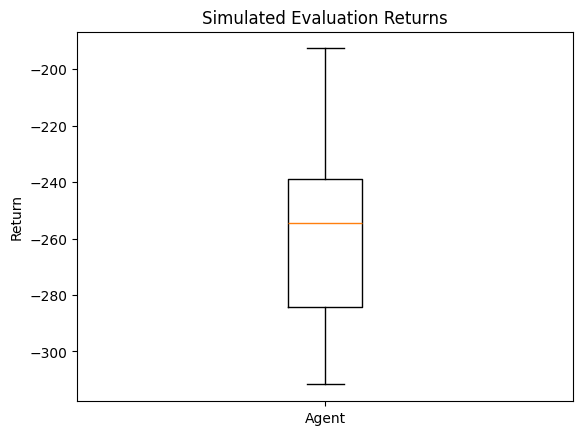

In [4]:
import numpy as np
import rliable.metrics as rm
import matplotlib.pyplot as plt

# Simulate evaluation returns from 10 seeds for an RL agent
simulated_returns = np.random.normal(loc=-250, scale=30, size=(10,))

# Here, we use rliable’s (hypothetical) aggregate function to compute metrics.
# (Note: Replace the following with the actual rliable function calls from its docs.)
mean_return = np.mean(simulated_returns)
ci_low, ci_high = np.percentile(simulated_returns, [2.5, 97.5])

print("Simulated Mean Return: {:.2f}".format(mean_return))
print("95% Confidence Interval: [{:.2f}, {:.2f}]".format(ci_low, ci_high))

# Plot a simple boxplot of the returns
plt.boxplot(simulated_returns, labels=["Agent"])
plt.title("Simulated Evaluation Returns")
plt.ylabel("Return")
plt.savefig("logs/quick_start_boxplot.png")
plt.show()


In [5]:
import numpy as np
from rliable import metrics

# Simulated data: 3 tasks, 5 runs each for two algorithms
np.random.seed(42)  # For reproducibility
data = {
    'Algorithm A': np.random.rand(3, 5),
    'Algorithm B': np.random.rand(3, 5)
}

# Compute IQM for each algorithm
iqm_scores = {alg: metrics.aggregate_iqm(scores) for alg, scores in data.items()}
print("IQM Scores:", iqm_scores)

IQM Scores: {'Algorithm A': 0.4885561659470326, 'Algorithm B': 0.3756286144499834}


In [6]:
data

{'Algorithm A': array([[0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864],
        [0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258],
        [0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497]]),
 'Algorithm B': array([[0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914],
        [0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998],
        [0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041]])}

In [7]:
import numpy as np
from rliable.library import get_interval_estimates, create_performance_profile
from rliable.metrics import aggregate_iqm, probability_of_improvement

# Example data: 3 tasks, 5 runs each for two algorithms
np.random.seed(42)  # For reproducibility
data = {
    'Algorithm A': np.random.rand(3, 5),
    'Algorithm B': np.random.rand(3, 5)
}

aggregate_func = lambda x: [aggregate_iqm(x)]
# Compute IQM and confidence intervals
point_estimate, interval_estimates = get_interval_estimates(data, aggregate_iqm, reps=1000)

print("IQM Scores:", point_estimate)
print("IQM Confidence Intervals:", interval_estimates)

IQM Scores: {'Algorithm A': 0.4885561659470326, 'Algorithm B': 0.3756286144499834}
IQM Confidence Intervals: {'Algorithm A': array([[0.30561618],
       [0.65861353]]), 'Algorithm B': array([[0.28294079],
       [0.46221453]])}


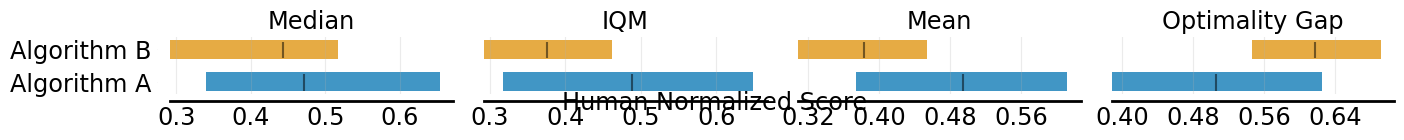

In [10]:
from rliable import plot_utils
aggregate_func = lambda x: np.array([
  metrics.aggregate_median(x),
  metrics.aggregate_iqm(x),
  metrics.aggregate_mean(x),
  metrics.aggregate_optimality_gap(x)])
aggregate_scores, aggregate_score_cis = get_interval_estimates(
  data, aggregate_func, reps=1000)
fig, axes = plot_utils.plot_interval_estimates(
  aggregate_scores, aggregate_score_cis,
  metric_names=['Median', 'IQM', 'Mean', 'Optimality Gap'],
  algorithms=list(data.keys()), xlabel='Human Normalized Score')

In [13]:
aggregate_score_cis

{'Algorithm A': array([[0.34003662, 0.31688728, 0.37455656, 0.38799716],
        [0.65317074, 0.64896916, 0.61200284, 0.62544344]]),
 'Algorithm B': array([[0.29214465, 0.29231055, 0.30873895, 0.54551928],
        [0.51708061, 0.46179622, 0.45448072, 0.69126105]])}

In [12]:

data

{'Algorithm A': array([[0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864],
        [0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258],
        [0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497]]),
 'Algorithm B': array([[0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914],
        [0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998],
        [0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041]])}

In [9]:
algorithms = list(data.keys())
# Load ALE scores as a dictionary mapping algorithms to their human normalized
# score matrices across all 200 million frames, each of which is of size
# `(num_runs x num_games x 200)` where scores are recorded every million frame.
ale_all_frames_scores_dict = ...
frames = np.array([1, 10, 25, 50, 75, 100, 125, 150, 175, 200]) - 1
ale_frames_scores_dict = {algorithm: score[:, :, frames] for algorithm, score
                          in ale_all_frames_scores_dict.items()}
iqm = lambda scores: np.array([metrics.aggregate_iqm(scores[..., frame])
                               for frame in range(scores.shape[-1])])
iqm_scores, iqm_cis = rly.get_interval_estimates(
  ale_frames_scores_dict, iqm, reps=50000)
plot_utils.plot_sample_efficiency_curve(
    frames+1, iqm_scores, iqm_cis, algorithms=algorithms,
    xlabel=r'Number of Frames (in millions)',
    ylabel='IQM Human Normalized Score')

AttributeError: 'ellipsis' object has no attribute 'items'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from rliable import metrics, library
from rliable import plot_utils as plot

# =====================
# 1. Generate Raw Data
# =====================
np.random.seed(42)

# Training checkpoints (in steps)
checkpoints = [1000, 10000, 100000]

# Algorithm data: 2 algorithms, 3 tasks, 5 runs, 3 checkpoints
raw_data = {
    "DQN": np.array([
        # 1k steps checkpoint
        np.array([
            # Task 1 (5 runs)
            [0.42, 0.38, 0.45, 0.40, 0.41],
            # Task 2 
            [0.55, 0.58, 0.52, 0.57, 0.53],
            # Task 3
            [0.48, 0.50, 0.47, 0.49, 0.51]
        ]),
        # 10k steps
        np.array([
            [0.65, 0.68, 0.63, 0.67, 0.66],
            [0.72, 0.75, 0.70, 0.73, 0.71],
            [0.69, 0.70, 0.68, 0.71, 0.67]
        ]),
        # 100k steps
        np.array([
            [0.71, 0.73, 0.70, 0.72, 0.69],
            [0.82, 0.85, 0.80, 0.83, 0.81],
            [0.78, 0.79, 0.77, 0.80, 0.76]
        ])
    ]),
    "PPO": np.array([
        # 1k steps
        np.array([
            [0.35, 0.32, 0.38, 0.33, 0.34],
            [0.45, 0.47, 0.42, 0.46, 0.43],
            [0.40, 0.42, 0.39, 0.41, 0.38]
        ]),
        # 10k steps
        np.array([
            [0.68, 0.72, 0.65, 0.70, 0.67],
            [0.75, 0.78, 0.73, 0.76, 0.74],
            [0.72, 0.74, 0.70, 0.73, 0.71]
        ]),
        # 100k steps
        np.array([
            [0.82, 0.85, 0.80, 0.83, 0.81],
            [0.88, 0.90, 0.87, 0.89, 0.86],
            [0.85, 0.86, 0.84, 0.87, 0.83]
        ])
    ])
}


frames = np.array([1, 3, 5]) - 1
# =====================
# 2. Verify Data Structure
# =====================

ale_frames_scores_dict = {algorithm: score[:, :, frames] for algorithm, score
                          in raw_data.items()}


In [ ]:
iqm = lambda scores: np.array([metrics.aggregate_iqm(scores[..., frame])
                               for frame in range(scores.shape[-1])])
iqm_scores, iqm_cis = get_interval_estimates(
  ale_frames_scores_dict, iqm, reps=50000)

In [ ]:
iqm_scores

{'DQN': array([0.664, 0.646, 0.652]), 'PPO': array([0.684, 0.66 , 0.672])}

In [ ]:
iqm_cis

{'DQN': array([[0.542, 0.528, 0.548],
        [0.74 , 0.728, 0.722]]),
 'PPO': array([[0.48 , 0.46 , 0.458],
        [0.812, 0.796, 0.8  ]])}

<Axes: xlabel='Number of Frames (in millions)', ylabel='IQM Human Normalized Score'>

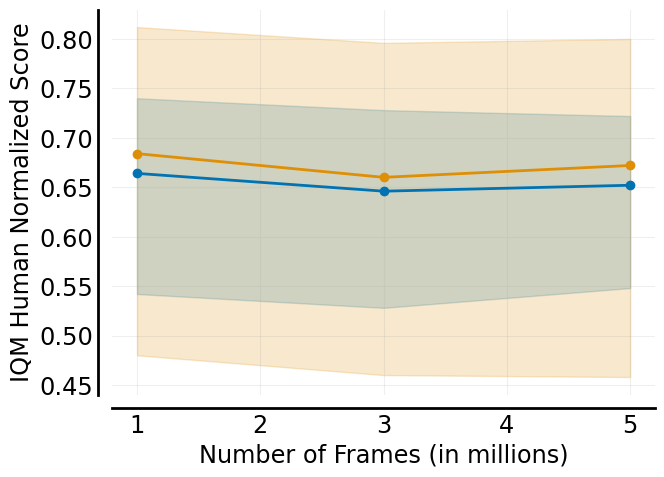

In [ ]:
plot_utils.plot_sample_efficiency_curve(
    frames+1, iqm_scores, iqm_cis, algorithms=list(raw_data.keys()),
    xlabel=r'Number of Frames (in millions)',
    ylabel='IQM Human Normalized Score')

In [ ]:

# 1. Generate data (1 task, 3 checkpoints, 5 runs)
checkpoints = [1000, 10000, 100000]
curve_data = {
    "DQN": [
        np.array([[0.4, 0.5, 0.6, 0.55, 0.58]]),  # (1 task, 5 runs)
        np.array([[0.7, 0.75, 0.8, 0.78, 0.72]]),
        np.array([[0.85, 0.9, 0.95, 0.88, 0.92]])
    ],
    "PPO": [
        np.array([[0.3, 0.35, 0.4, 0.38, 0.33]]),
        np.array([[0.65, 0.7, 0.75, 0.72, 0.68]]),
        np.array([[0.8, 0.85, 0.9, 0.87, 0.83]])
    ]
}

# 2. Calculate metrics and CIs
point_estimates = {}
interval_estimates = {}



# 3. Plot with required arguments
fig, ax = plt.subplots(figsize=(10, 6))
plot.plot_sample_efficiency_curve(
    frames=checkpoints,
    point_estimates=point_estimates,
    interval_estimates=interval_estimates,
    xlabel="Environment Frames",
    ylabel="IQM Score",
    labelsize=12,
    ticklabelsize=10
)
plt.show()

IndexError: invalid index to scalar variable.

In [ ]:
import rliable
print(rliable.__version__)  # Requires ≥1.0 for auto estimates

AttributeError: module 'rliable' has no attribute '__version__'